<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>


**CONTESTO:**

Il set di dati CalCOFI rappresenta la serie temporale più lunga (1949-oggi) e più completa (più di 50.000 stazioni di campionamento) di dati oceanografici e larvali di pesci nel mondo. Include dati sull'abbondanza delle larve di oltre 250 specie di pesci; dati sulla frequenza della lunghezza larvale e dati sull'abbondanza di uova su specie commerciali chiave; e dati oceanografici e planctonici. I dati fisici, chimici e biologici raccolti a intervalli regolari di tempo e spazio sono diventati rapidamente preziosi per documentare i cicli climatici nella Corrente della California e una serie di risposte biologiche ad essi.


**OBIETTIVO:** 

Rispondere alle seguenti domande analizzando e creando uno o più modelli predittivi, utilizzando i vari algoritmi visti a lezione (albero decisionale regressore, regressione lineare etc..) a partire dai dati a disposizione e su un subset delle prime 500 righe:

-------------------------------------------------------------------------
- Esiste una relazione tra salinità dell'acqua e temperatura dell'acqua? Giustifica la tua risposta con l'output del tuo modello predittivo
- Puoi prevedere la temperatura dell'acqua in base alla salinità?


**DATI A DISPOSIZIONE:**

Da questo link puoi scaricare i dati necessari:

https://www.kaggle.com/datasets/sohier/calcofi




# Oceanographic analysis

## Exploratory data analysis

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10.0, 8) # set default size of plots
pd.set_option('display.max_rows', 2536)
pd.set_option('display.max_columns', 100)

### Cleaning data

In [28]:
# Loading the dataframes
#cast = pd.read_csv('./cast.csv', low_memory=False, nrows=500)
bottle = pd.read_csv('./bottle.csv', low_memory=False, nrows=500)

# Removing null columns
bottle_null_percentages = bottle.isnull().mean()
bottle_null_cols = bottle_null_percentages[bottle_null_percentages > 0.6].index.tolist()
#cast_null_percentages = cast.isnull().mean()
#cast_null_cols = cast_null_percentages[cast_null_percentages > 0.6].index.tolist()

bottle.drop(bottle_null_cols, axis=1, inplace=True)
#cast.drop(cast_null_cols, axis=1, inplace=True)

# Remove useless features
bottle_useless_features = ['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'R_Depth', 'R_TEMP', 'R_POTEMP',
       'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_PRES', 'P_qual', 'O_qual', 'O2Satq', 'Chlqua', 'Phaqua', 'PO4q', 'SiO3qu',
       'NO2q', 'NO3q', 'NH3q', 'C14A1q', 'C14A2q', 'DarkAq', 'MeanAq', 'STheta', 'RecInd', 'T_prec', 'S_prec']
#cast_useless_features = ['Cst_Cnt', 'Cruise_ID', 'Cruise', 'Cruz_Sta', 'DbSta_ID', 'Cast_ID',
#       'Sta_ID', 'Ship_Name', 'Ship_Code',
#       'Data_Type', 'Event_Num', 'Orig_Sta_ID', 'Cruz_Num', 'Sta_Code', 'Date', 'Year', 'Lat_Dec', 'Lon_Dec', 'St_Line',
#       'Rpt_Sta', 'Lat_Hem', 'Julian_Date', 'Julian_Day', 'St_Station', 'Ac_Line']

bottle.drop(bottle_useless_features, axis=1, inplace=True)
#cast.drop(cast_useless_features, axis=1, inplace=True)

<Axes: >

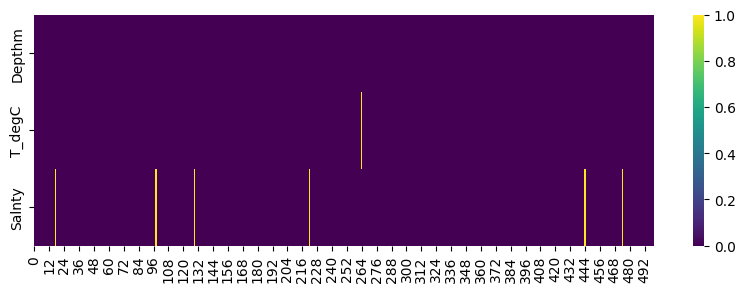

In [41]:
plt.rcParams['figure.figsize'] = (10.0, 3) # set default size of plots
sns.heatmap(bottle.transpose().isnull(), cmap='viridis')

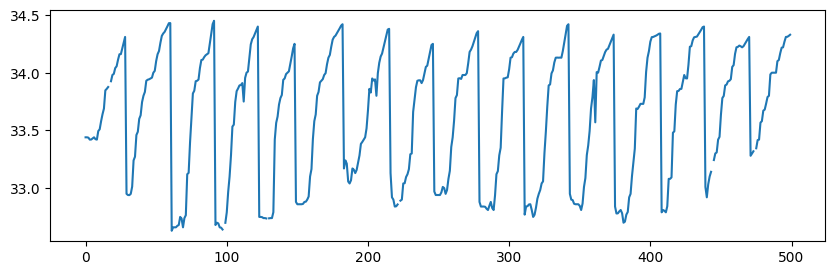

In [42]:
plt.plot(bottle['Salnty'])

In [ ]:
bottle['Salnty'].fillna(inplace=True)

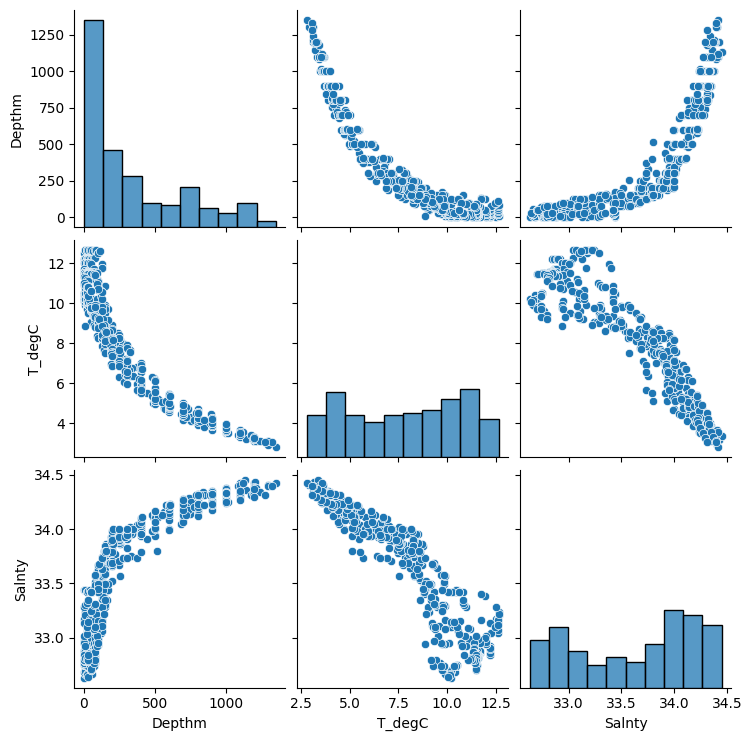

In [29]:
sns.pairplot(bottle)

In [31]:
features = ['Depthm', 'Salnty']
target = 'T_degC'

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bottle[features].values, bottle[target].values, test_size = 0.1, random_state=1)

## Linear regression
Predict the temperature with salinity and depth of water

In [33]:
from sklearn.linear_model import LinearRegression
# Initialize the dictonary for error metrics
parameter_errors = dict()

i = 0

for deg in range(9):

    # crea le features polinomiali
    poly = PolynomialFeatures(degree=deg)
    x_poly = poly.fit_transform(X_train)

    # esegue la regressione lineare
    reg = LinearRegression(n_jobs=-1)
    reg.fit(x_poly, y_train)

    # Make a prediction
    X_test_poly = poly.fit_transform(X_test)
    y_pred = reg.predict(X_test_poly)

    parameter_errors[i] = {'MSE': mean_squared_error(y_test, y_pred),
                           'ME':  max_error(y_test, y_pred),
                           'MAE': mean_absolute_error(y_test, y_pred),
                           'Deg': deg}
    i += 1

    print("Deg", deg, 'done')

ValueError: Input X contains NaN.
PolynomialFeatures does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
errors_deg = pd.DataFrame(parameter_errors).T
errors_deg.sort_values(['MAE', 'ME', 'MSE'], inplace=True)
errors_deg.head()

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(errors_deg, hue="MAE", 
             x_vars=['Deg'],
             y_vars=['MSE', 'ME', 'MAE'])